In [1]:
import numpy as np
import pandas as pd
import linecache
import ctypes

In [2]:
class Newnode :
    def __init__(self):
        self.key = -1 
        self.concept =" "
        self.neigh = []
        self.relation_w_n = []
        self.skills = []

In [3]:
def createnode(key,concept,skills,neighbours,relations):
    node = Newnode()
    node.key = key
    node.concept = concept
    node.neigh = neighbours
    node.skills = skills
    node.relation_w_n = relations
    return node

In [4]:
def update(key,key_node,relatives,relations):
    for i in range(len(relatives)):
        key_node[relatives[i]].neigh.append(key)
        key_node[relatives[i]].relation_w_n.append(-relations[i])

In [5]:
out_file = open("output.txt",'a+')
concept_data= open("Concepts_data.txt","r")
lines  = concept_data.readlines()
lines=[x.strip() for x in lines]
key_node = {}
all_relations_for_graph = []

In [6]:
for i in range(int(len(lines)/5)) :
    key = int(lines[5*i])
    concept = lines[5*i+1]
    skills = lines[5*i+2].split()
    neigh = lines[5*i+3].split()
    relation = lines[5*i+4].split()
    s = []
    n = []
    r = []
    for j in range(len(skills)) :
        s.append(int(skills[j]))
    if(neigh[0]!="-"):
        for j in range(len(neigh)):
            n.append(int(neigh[j]))
            r.append(int(relation[j]))
            all_relations_for_graph.append((key,int(neigh[j])))
    node = createnode(key,concept,s,n,r)
    key_node[key] = node
    update(key,key_node,n,r)

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()

In [9]:
all_relations_for_graph

[(2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),
 (101, 1),
 (102,

C:\Users\adity\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


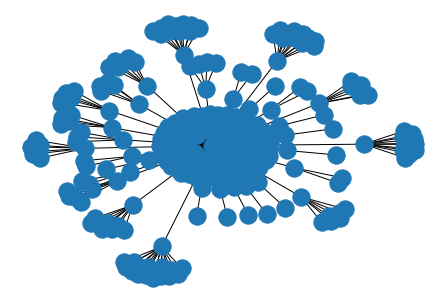

In [10]:
# adding just one node:
G.add_node(1)
# a list of nodes:
G.add_nodes_from(key_node.keys())
G.add_edges_from(all_relations_for_graph)
nx.draw(G)